# Data Exploration & Visualization
Welcome to this notebook on data exploration and visualization. In this lesson, we'll cover how to explore and understand datasets using Python tools such as `pandas`, `matplotlib`, and `seaborn`.

## What is Data Exploration?
**Data Exploration**, or Exploratory Data Analysis (EDA), is the process of examining datasets to summarize their main characteristics, often using visual methods. It helps you:
- Understand the structure and contents of your data
- Detect outliers and missing values
- Form hypotheses and discover patterns

We'll work with a sample dataset and go through a structured EDA process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load a sample dataset
df = sns.load_dataset('titanic')
df.head()

Fontconfig warning: ignoring UTF-8: not a valid region tag


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Summary Statistics
We start by understanding the general shape and statistical summary of the dataset.

In [2]:
df.shape  # Rows and columns

(891, 15)

In [3]:
df.info()  # Data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe(include='all')  # Summary statistics for all columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling Missing Values
Visualizing and understanding where data is missing can help decide how to treat them.

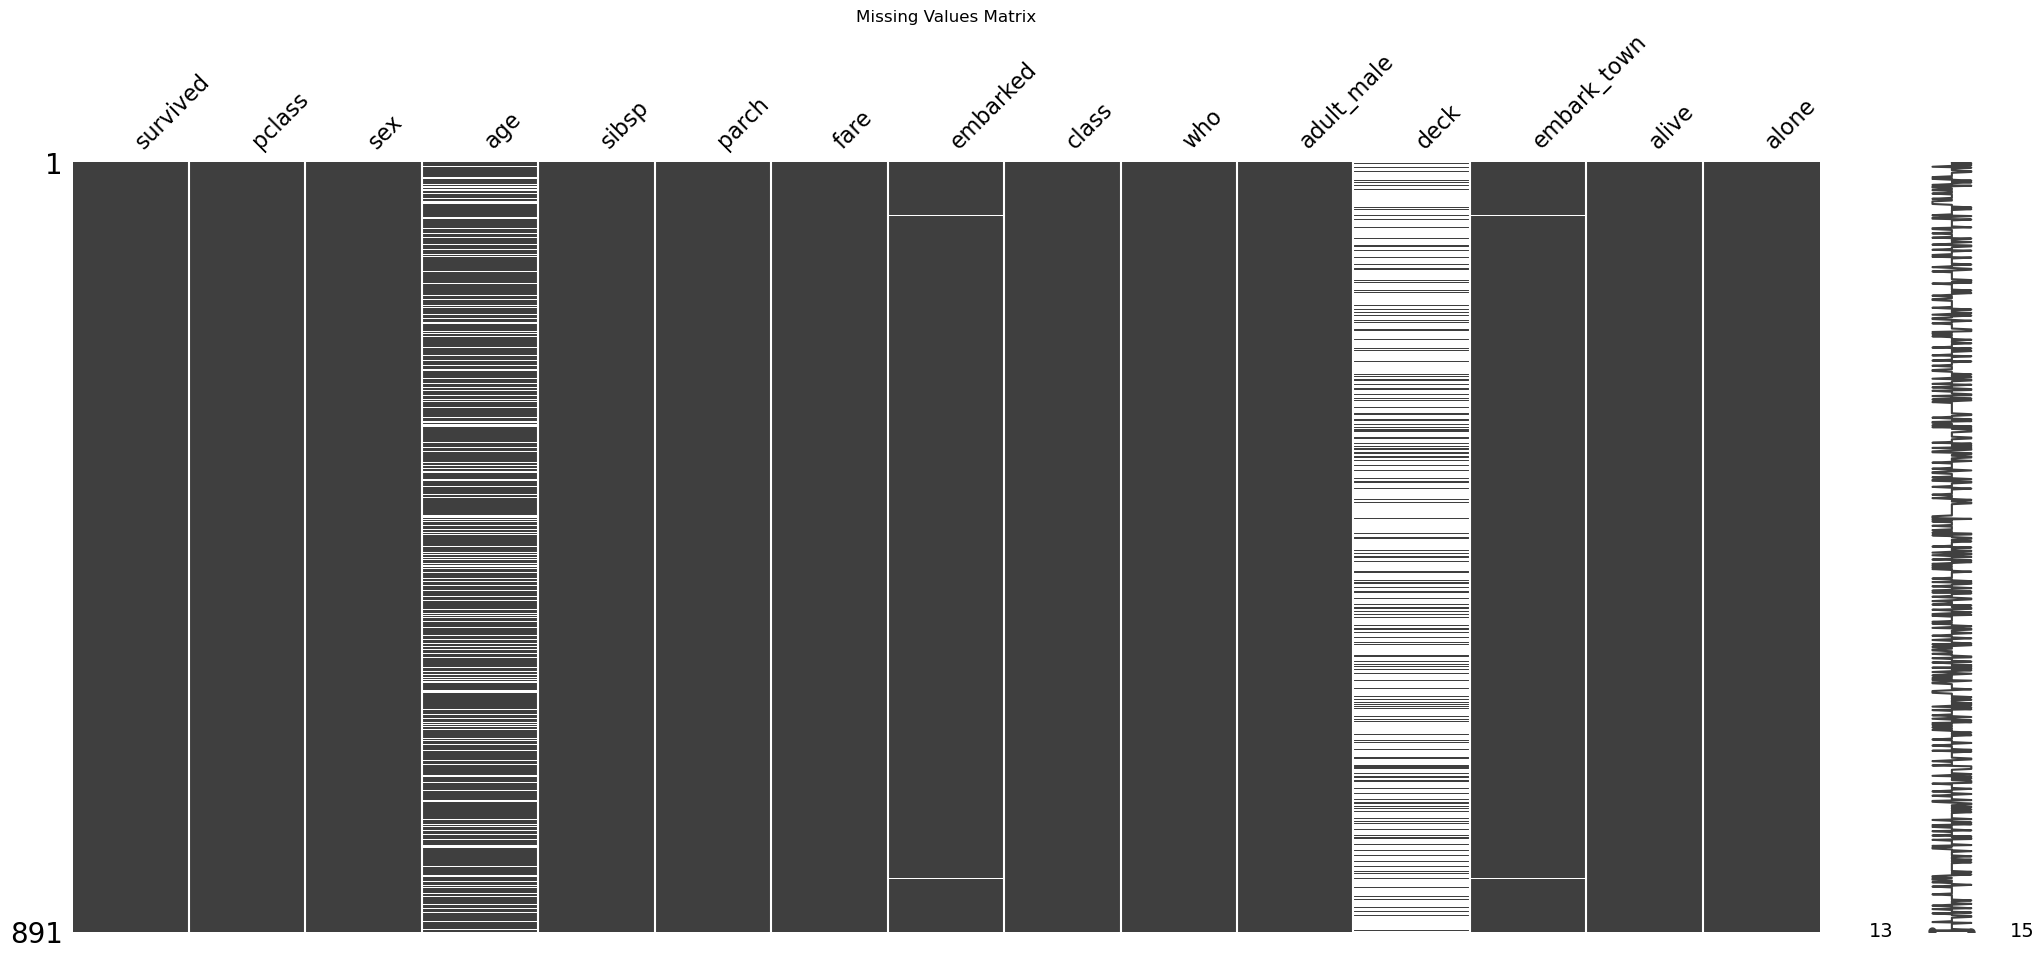

In [7]:
import missingno as msno
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

## Univariate Analysis
Let's examine individual variables to understand their distributions.
We'll start with numeric and then move to categorical variables.

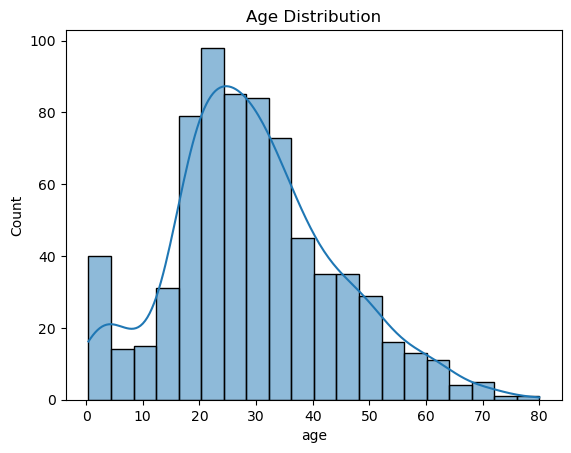

In [8]:
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

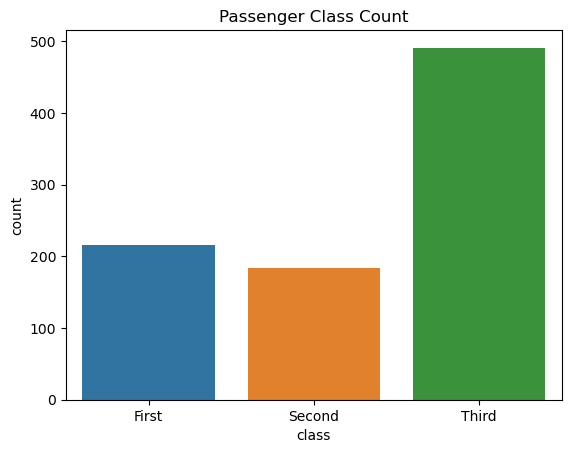

In [9]:
sns.countplot(x='class', data=df)
plt.title('Passenger Class Count')
plt.show()

## Bivariate Analysis
We now explore relationships between variables.

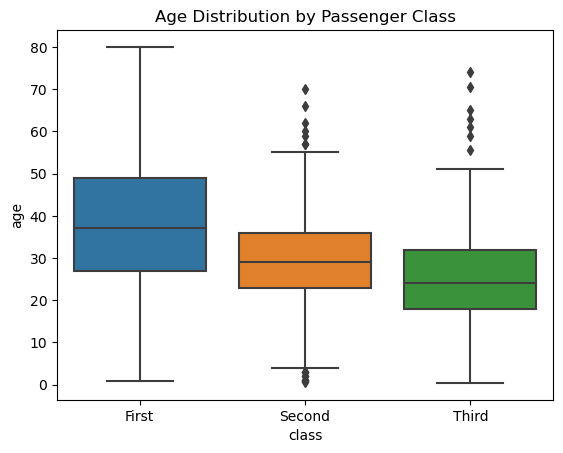

In [10]:
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

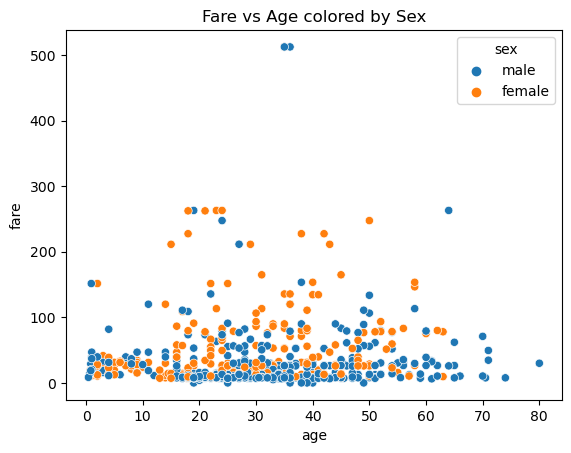

In [11]:
sns.scatterplot(x='age', y='fare', hue='sex', data=df)
plt.title('Fare vs Age colored by Sex')
plt.show()

## Correlation Heatmap
Correlation helps identify how numeric variables are related.

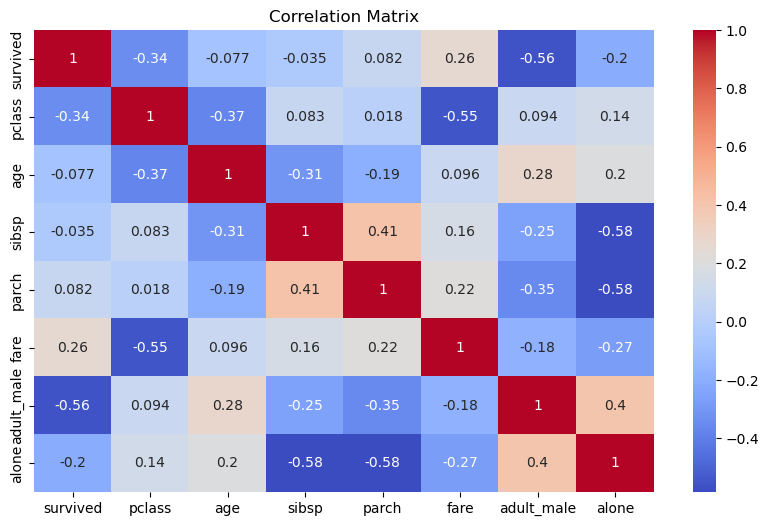

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Saw this used and loved it -- https://docs.profiling.ydata.ai/latest/

## Matplotlib - a tale of three (?) API's
Matplotlib is one of the most well-known plotting libraries for python. However, at the beginning, it can be difficult to wrap your head around.

It has 3 different APIs (ways of writing code to draw graphs).

- MATLAB / state based interface
- object oriented 

The two main abstractions in matplotlib are the **Figure** and **Axes**
- Figure = final image (can have many Axes)
- Axes = individual plot


![](assets/mpl-faq.png)
[From the matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html)

## "Mistakes, we’ve drawn a few"
- The economist talks about how they could improve charts they made in the past

https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

### Truncating the scale

Putting break points in the scale distorts the chart

![](assets/truncating.png)

### Choosing scales to force relationships

![](assets/scales.png)

### Using a line chart to show trend

Instead use dots for the individual points, smoothed line for the trend

![](assets/trend.png)

## Conclusion
EDA is the foundation of any data science project. It helps build understanding, guide preprocessing decisions, and inform modeling strategies.